In [1]:
import sys; sys.path.append('/Users/shomakitamiya/Documents/python/snake3D/src/Toolbox')
import math

%matplotlib notebook
import matplotlib

import geomdl.visualization.VisMPL as VisMPL
import matplotlib.pyplot as plt
import numpy as np
from geomdl import BSpline
from geomdl.fitting import approximate_surface
from geomdl.knotvector import generate
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
from skimage.segmentation import flood_fill

import Toolbox as tb

In [2]:
img = tb.load_test_medical_image()
tb.show_ct_image(img)

0.6063308615740595
[20  6  6]
0.7720841307374566
[19  5  5]
0.8185241466477402
[18  5  5]
0.8406349250756524
[17  5  5]
0.8619866338904898
[16  4  4]
0.8542239441299841
[15  4  4]
0.8653656469705467
[14  4  4]
0.8619224644365143
[13  4  4]
0.8774343246101184
[13  3  3]
0.8710732916628564
[12  3  3]
0.8694146128797209
[11  3  3]
0.8680129496934116
[11  3  3]
0.8588455289050059
[10  3  3]
0.8613774011428755
[10  3  3]
0.86946937768432
[9 2 2]
0.8692564899653787


<IPython.core.display.Javascript object>


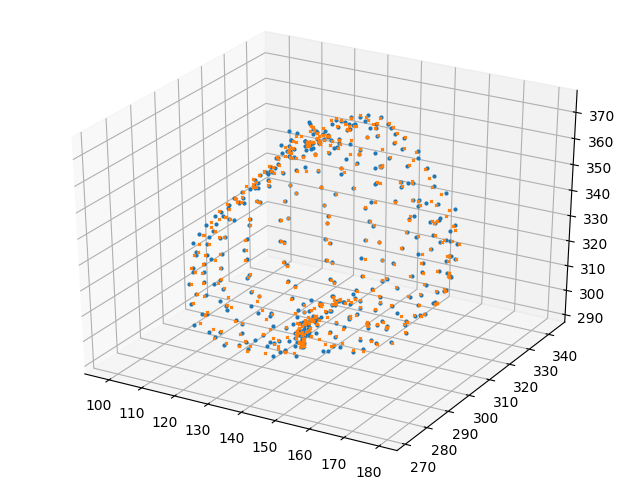

In [3]:
center = np.array([140,300,330])
radius = 35

surf = tb.make_sphere_surf(center,radius)

rect_size = np.array([20,6,6])

surf = tb.cul_contour(img,surf,rect_size)

<IPython.core.display.Javascript object>


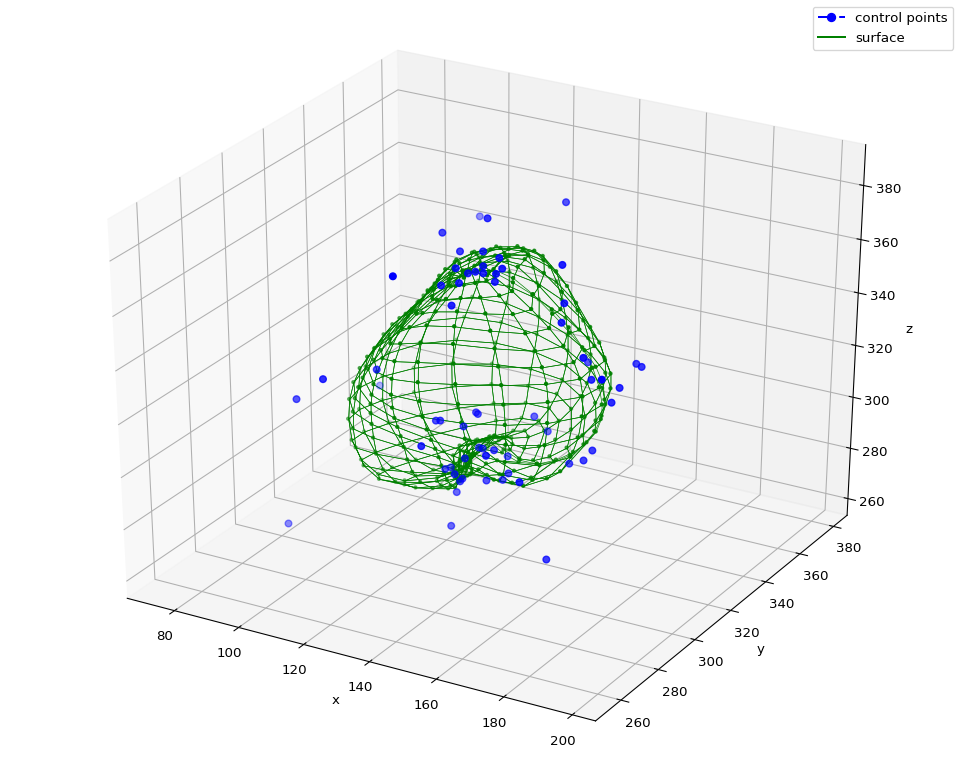

<IPython.core.display.Javascript object>


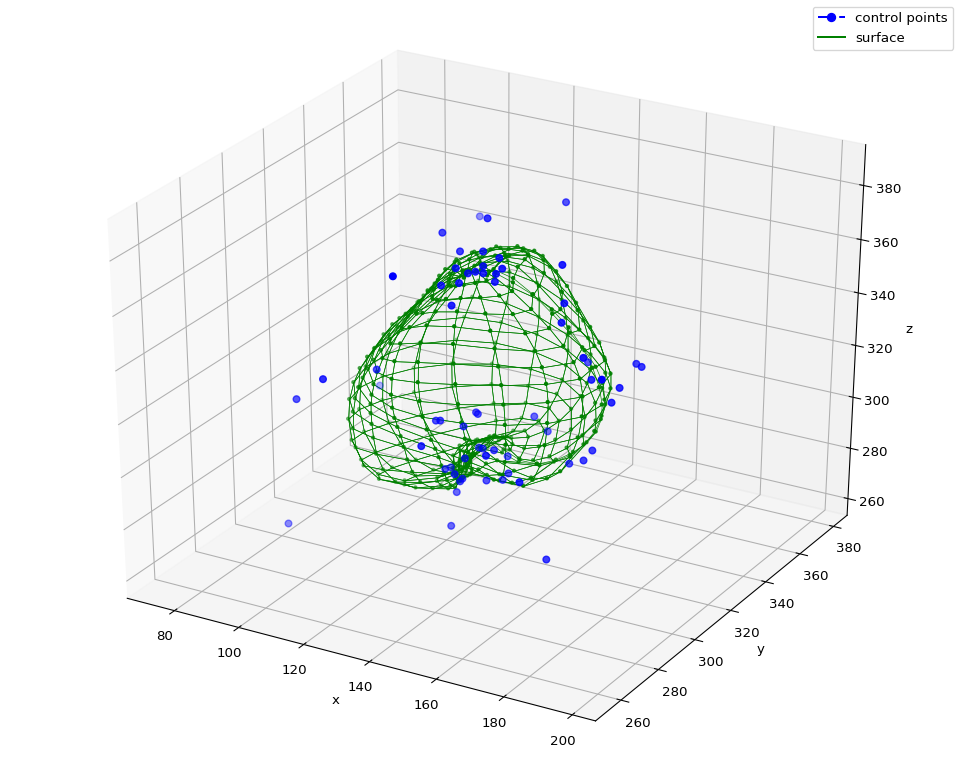

In [4]:
surf.delta = 0.05
surf.vis = VisMPL.VisSurfWireframe()
surf.render()

In [5]:
surf.delta = 0.005
surface_points = np.array(surf.evalpts)

img_mask = np.zeros(img.shape,dtype=np.uint8)

indices = surface_points.astype(np.int32)
img_mask[indices[:,0],indices[:,1],indices[:,2]] = 255

# img_mask = flood_fill(img_mask, tuple(center),255)

#tb.show_image_collection(img_mask)

In [6]:
color_img = np.zeros((img.shape[0],img.shape[1],img.shape[2],3))
color_img[:,:,:,0] = np.where(img_mask==255,1,img)
color_img[:,:,:,1] = np.where(img_mask==255,0,img)
color_img[:,:,:,2] = np.where(img_mask==255,0,img)

# color_img[center[0],center[1],center[2],2] = 1
color_img[center[0]-5:center[0]+5,center[1]-5:center[1]+5,center[2]-5:center[2]+5,2] = 1

tb.show_ct_image(color_img)